In [88]:
%pylab inline

import pandas as pd
import corona
import torch.optim as optim

from sklearn.metrics import confusion_matrix

Populating the interactive namespace from numpy and matplotlib


In [132]:
from importlib import reload
reload(corona)

<module 'corona' from '/Users/isaacdrachman/GitHub/ML-Projects/corona.py'>

# Kaggle COVID-19 Chest X-Ray Challenge 
Dataset from https://www.kaggle.com/c/csc532/data

Images classified as either "Normal" or "Pneumonia", with pnemonia cases further specified as below.

In [22]:
pd.read_csv('./coronahack-chest-xraydataset/Chest_xray_Corona_dataset_Summary.csv',index_col=0)

,Label,Label_1_Virus_category,Label_2_Virus_category,Image_Count
0,Normal,NaN,NaN,1576
1,Pnemonia,Stress-Smoking,ARDS,2
2,Pnemonia,Virus,NaN,1493
3,Pnemonia,Virus,COVID-19,58
4,Pnemonia,Virus,SARS,4
5,Pnemonia,bacteria,NaN,2772
6,Pnemonia,bacteria,Streptococcus,5


In [53]:
# Set up datasets and nn model. 
# The data files are structured in folders "bacteria", "virus", and "normal". 
# I use the torchvision dataset class ImageFolder which auto-labels the data accordingly.
loaders = corona.setup()
model = corona.Model()

print(loaders['train'].dataset.dataset.class_to_idx)
idx_to_class = {idx: class_ for class_, idx in loaders['train'].dataset.dataset.class_to_idx.items()}

{'bacteria': 0, 'normal': 1, 'viral': 2}


target: bacteria (0)


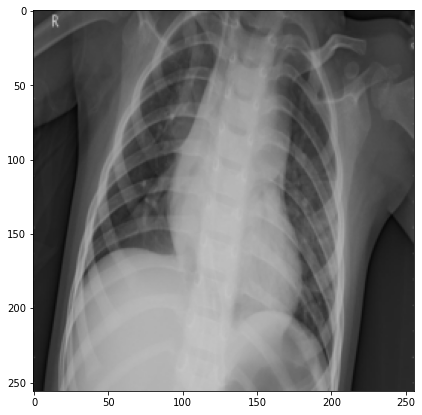

In [55]:
# Example image.
figsize(7,7)
example = loaders['train'].dataset[0]

imshow(example[0].reshape(256,256,3))
print('target: {} ({:d})'.format(idx_to_class[example[1]], example[1]))

In [56]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [57]:
# Start training! Prints stats every 20 batches and runs validation / saves model params every epoch.
model, losses, accuracies = corona.train_many(10, model, optimizer, loaders['train'], loaders['test'])

[1 /10]	 Accuracy: 75.00%
[2 /10]	 Accuracy: 71.00%
[3 /10]	 Accuracy: 77.00%
[4 /10]	 Accuracy: 79.00%
[5 /10]	 Accuracy: 81.00%
[6 /10]	 Accuracy: 74.00%
[7 /10]	 Accuracy: 73.00%
[8 /10]	 Accuracy: 80.00%
[9 /10]	 Accuracy: 84.00%
[10/10]	 Accuracy: 83.00%


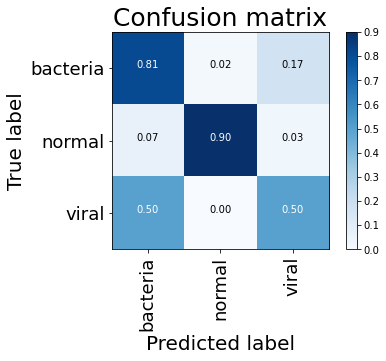

In [133]:
# Evaluate on a random sample from the test set.
sample = corona.get_sample(loaders['test'])
cnf_matrix = confusion_matrix(sample[1], model(sample[0]).argmax(axis=1))
corona.plot_confusion_matrix(cnf_matrix, loaders['train'].dataset.dataset.classes)